# Прикладная статистика в машинном обучении 2021-2022

## Домашнее задание #2

### Дедлайн: 14 декабря 2021 года, 23:59

**Правила игры**

1. Домашнее задание состоит из двух задач, каждая из которых оценивается в 5 баллов. Все пункты в пределах одной задачи имеют одинаковый вес.

2. Каждый пункт оценивается с промежутком $0.5$. Например, если за пункт можно получить максимум $1$ балл, то за полностью корректное решение ставится $1$ балл, за решение с небольшими ошибками ставится $0.5$ балла, за решение с серьёзными ошибками или неправильное решение ставится $0$ баллов. Для пунктов, за которые можно получить максимум $2$ балла, в зависимости от решения можно получить $2$, $1.5$, $1$ и т.д. баллов. При этом пункты проверяются независимо друг от друга: если пункт $t+1$ зависит от численных результатов пункта $t$, и в пункте $t$ допускается ошибка, из-за которой в пункт $t+1$ приходят неверные входные данные, то при корректном решении пункт $t+1$ оценивается в максимальное количество баллов, которое можно за него получить.

3. Весь код должен быть написан на Python, R, C или C++.

4. Решения принимаются до **14 декабря 2021 года, 23:59 МСК** включительно. Работы, отправленные после дедлайна, **не проверяются**. Дата и время сдачи определяются по последнему запушенному в репозиторий коммиту (можно увидеть на GitHub, наведя мышкой на указатель срока (например, 3 days ago) справа от файлов).

5. Все решения нужно загрузить в личный репозиторий на [GitHub Classroom](https://classroom.github.com/a/HTd0GCXS).

6. Репозиторий должен содержать файл(ы) с кодом и текстовыми пояснениями к решению задач. При этом:

* Если вы пишете код в тетрадке .ipynb, то пояснения и выводы можно указывать в ячейках Markdown, и в репозиторий достаточно загрузить один файл, названный по типу «name\_surname\_group\_hw2.ipynb».

* Если вы пишете код в отдельных текстовых файлах, то пояснения и выводы нужно вынести в отчёт, который можно написать в любимом текстовом редакторе и экспортировать в pdf. В репозиторий нужно загрузить все файлы с кодом (если их несколько, то в README.md требуется подробно указать, что содержит каждый файл), названные по типу «name\_surname\_group\_hw2\_filename.ext», где вместо ext может быть .py, .R, .c, .cpp, а также отчёт, названный по типу «name\_surname\_group\_hw2\_report.pdf». 

7. Разрешается использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания. Разрешается использовать любые свободные источники с указанием ссылки на них.

8. Плагиат не допускается. При обнаружении случаев списывания, $0$ за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал. 

---

**Disclaimer:** для проверки гипотез используйте ваш любимый уровень значимости!

**Hint:** в statsmodels есть всё-всё-всё! 

---

## Задача 1: "Cloudy, with a chance of..." (5 баллов).

В этой задаче нам предстоит проанализировать набор данных [Weather in Szeged 2006-2016](https://www.kaggle.com/budincsevity/szeged-weather), содержащий информацию о погоде. Формат задачи свободный: оцениваются любые разумные действия. В качестве зависимой переменной возьмём температуру воздуха (`temperature`).

Наша цель состоит в том, чтобы построить две линейные регрессионные модели: объясняющую и предиктивную. Объясняющая модель должна быть пригодна для статистической интерпретации зависимостей, то есть показывать, какие факторы влияют на температуру воздуха, каким образом и какое возможное объяснение этого влияния можно привести. Предиктивная модель может быть совершенно ужасной с точки зрения статистики (например, регрессия может быть не значимой в целом), но она должна давать хорошие прогнозы в соответствии с некоторой метрикой.

Хотя приведённые данные имеют формат временных рядов, мы будем игнорировать это и рассматривать их как обычные кросс-секционные данные.

**Предобработка данных**. Загрузите данные и проведите любую предобработку, которую считаете нужной. Поясните свои действия.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from statsmodels.regression.linear_model import OLS
from statsmodels.sandbox.regression.gmm import IV2SLS
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.outliers_influence import variance_inflation_factor

/Users/yasha_ten/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/yasha_ten/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
df = pd.read_csv('weatherHistory.csv')
print(df.shape)
df.head()

(96453, 12)


Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [3]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True) ## to datetine

## add features
df['year'] = df['Formatted Date'].dt.year
df['month'] = df['Formatted Date'].dt.month
df['day'] = df['Formatted Date'].dt.day
df['hour'] = df['Formatted Date'].dt.hour

df.drop('Loud Cover', axis=1, inplace = True) ## колонка нулей

In [4]:
df['year'] = df['Formatted Date'].dt.year
df['month'] = df['Formatted Date'].dt.month
df['day'] = df['Formatted Date'].dt.day
df['hour'] = df['Formatted Date'].dt.hour

In [5]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
year                          0
month                         0
day                           0
hour                          0
dtype: int64

In [6]:
## заполним пропуски для Nan значений precip type

df.loc[df['Precip Type'].isnull(), 'Precip Type'] = 'no'

In [7]:
## переименуем колонки для удобства

df.rename(columns={'Apparent Temperature (C)': 'feel_temp',
                   'Temperature (C)': 'target', 'Wind Speed (km/h)': 'wind_speed',
                  'Wind Bearing (degrees)': 'wind_side',
                  'Visibility (km)': 'visibility', 'Pressure (millibars)': 'pressure',
                  'Precip Type': 'precip', 'Daily Summary': 'daily_sum'}, inplace=True)

In [8]:
## удалим дубликаты

df.drop_duplicates(inplace=True)

In [9]:
df.head(1)

Formatted Date        Summary precip    target  feel_temp  \
0 2006-03-31 22:00:00+00:00  Partly Cloudy   rain  9.472222   7.388889   

   Humidity  wind_speed  wind_side  visibility  pressure  \
0      0.89     14.1197      251.0     15.8263   1015.13   

                           daily_sum  year  month  day  hour  
0  Partly cloudy throughout the day.  2006      3   31    22

In [10]:
## закодируем категориальные признаки

cat = ['Summary', 'precip', 'daily_sum']
df[cat] = df[cat].apply(LabelEncoder().fit_transform)

In [11]:
## удалим выбросы

df = df[df['pressure'] > df['pressure'].mean() - 3 * df['pressure'].std()]
df = df[df['Humidity'] < df['Humidity'].mean() + 3 * df['Humidity'].std()]

**Построение объясняющей модели.**

**Пункт 1.** Выберите независимые переменные, которые будут включены в объясняющую модель. Поясните, почему выбор этих переменных разумен (не нужно углубляться в физику поведения жидкостей и ссылаться на уравнения Навье-Стокса, достаточно понятной научно-популярной интерпретации).

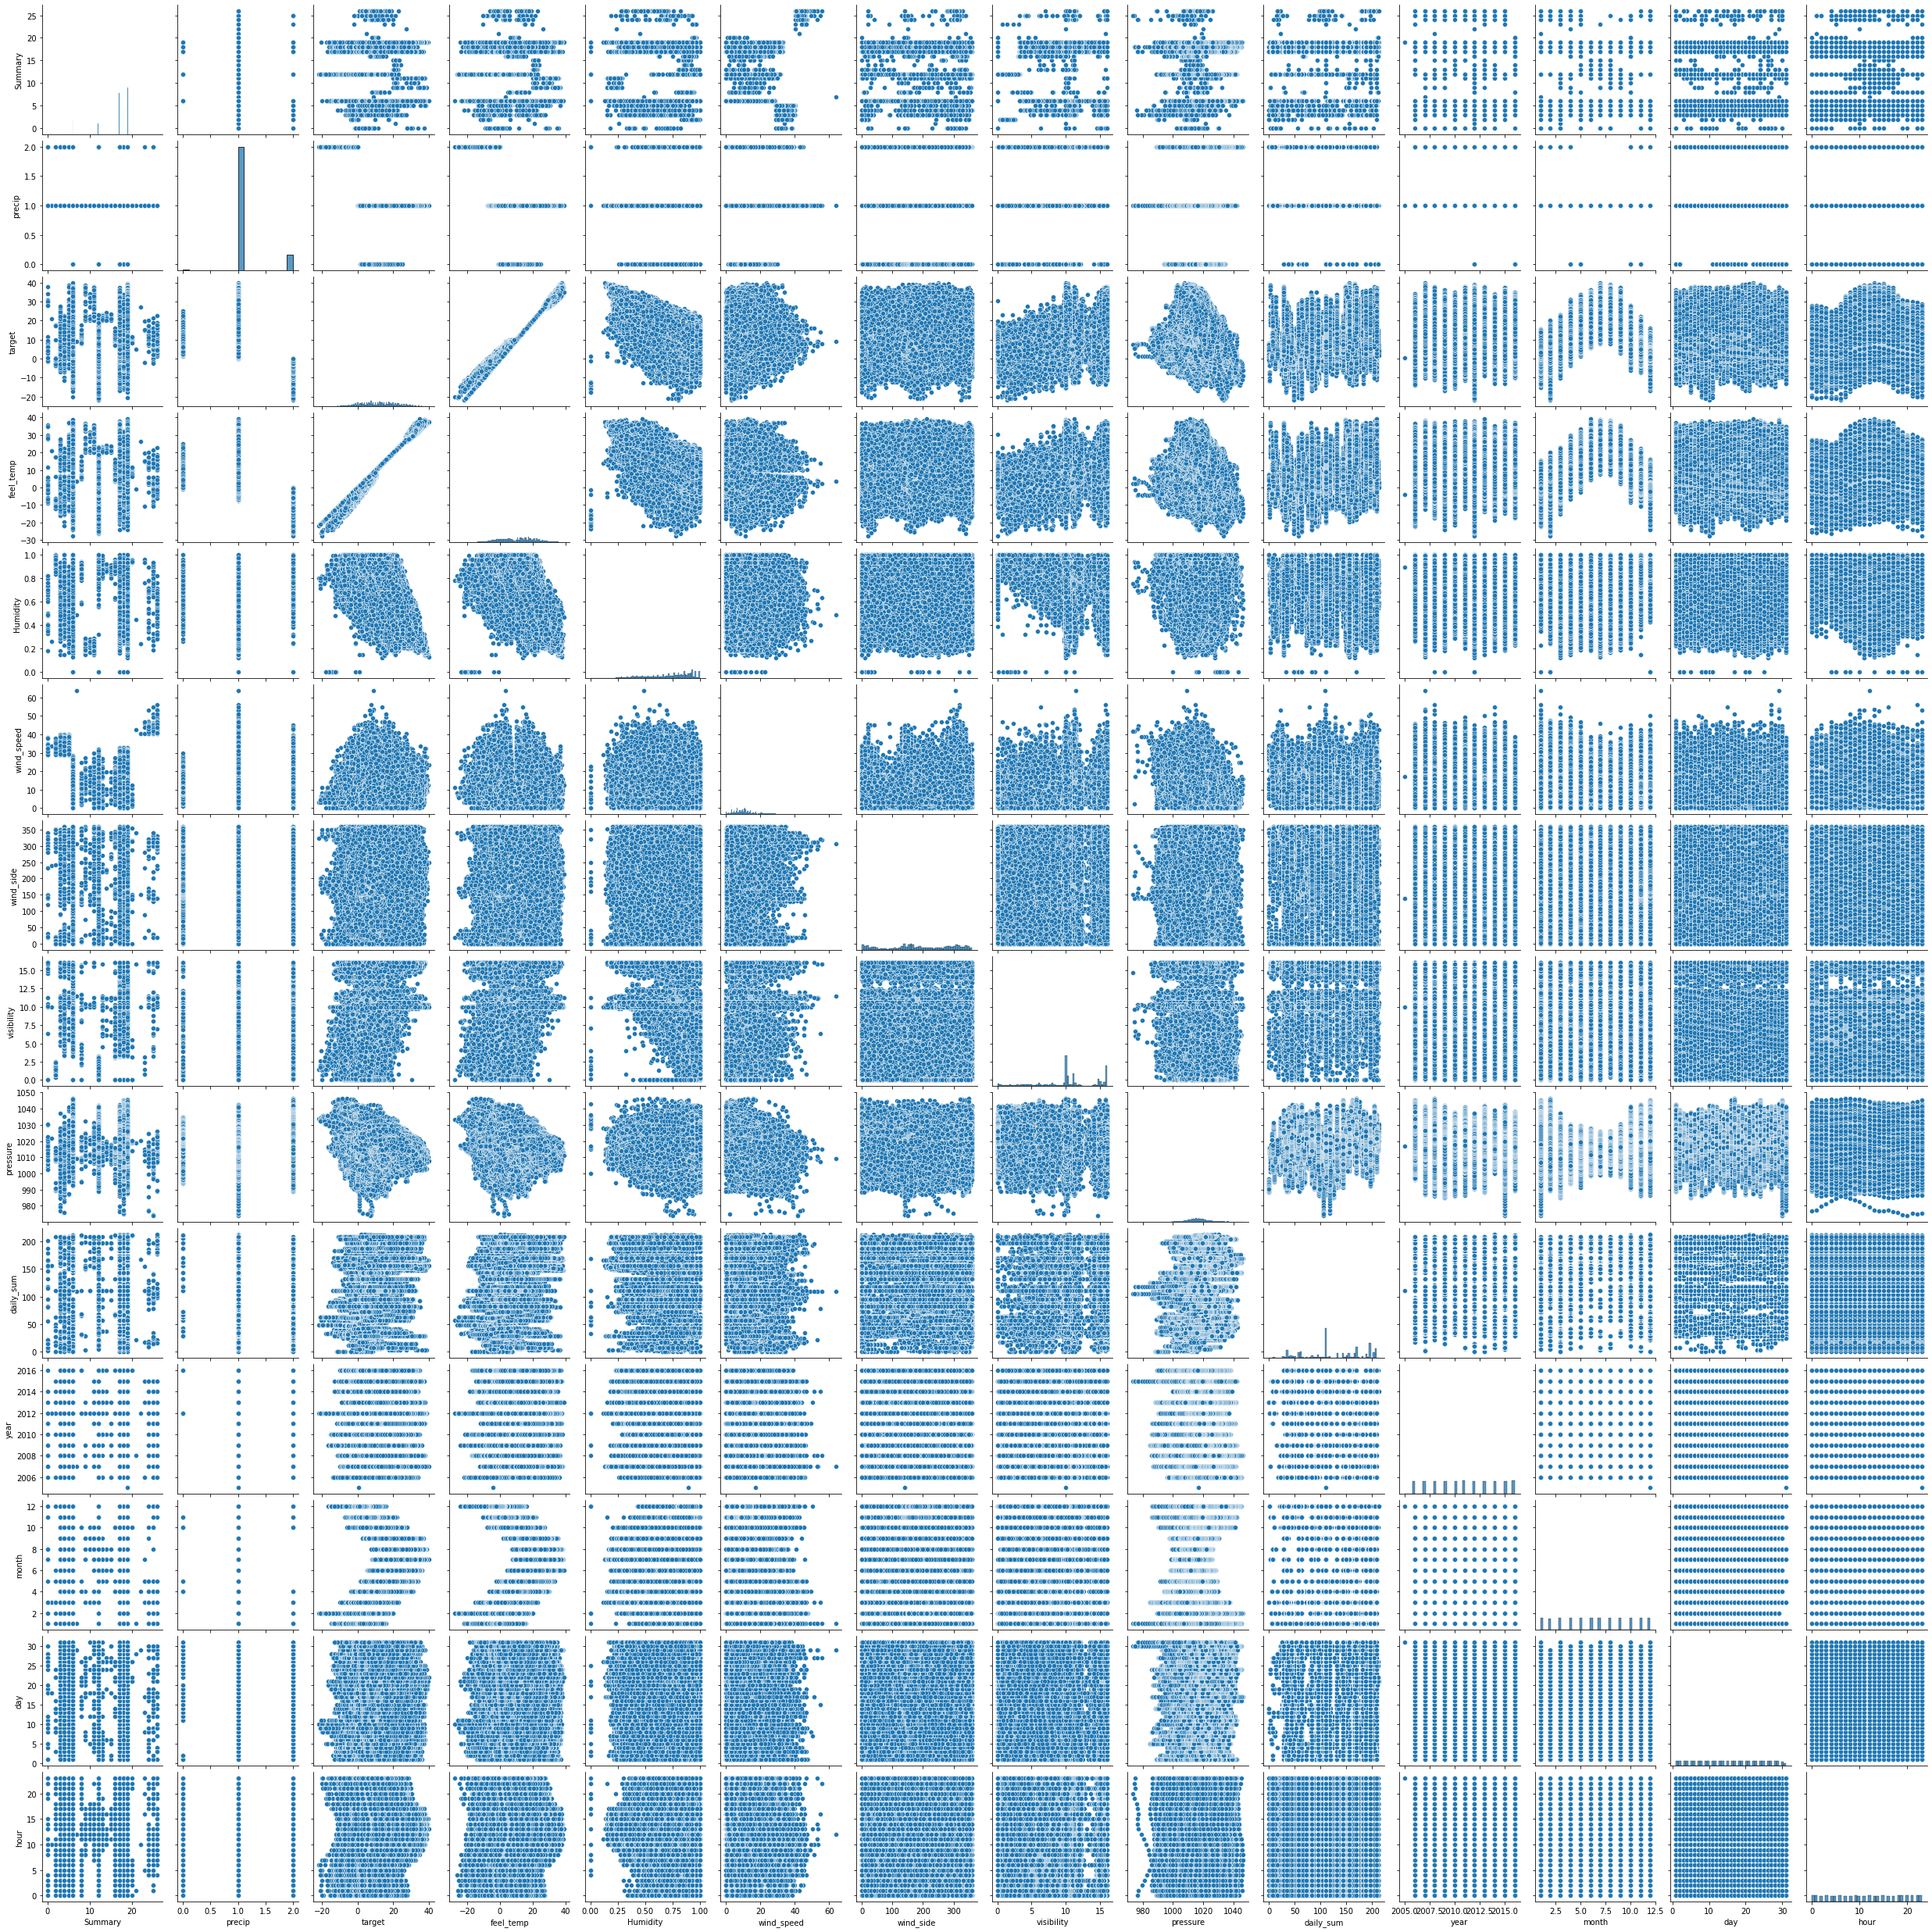

In [12]:
sns.pairplot(df)
plt.show()

In [13]:
df.corr()

Summary    precip    target  feel_temp  Humidity  wind_speed  \
Summary     1.000000 -0.105523  0.148082   0.143142 -0.119862    0.008879   
precip     -0.105523  1.000000 -0.541575  -0.544301  0.225305   -0.070523   
target      0.148082 -0.541575  1.000000   0.992648 -0.632854    0.010547   
feel_temp   0.143142 -0.544301  0.992648   1.000000 -0.603506   -0.054851   
Humidity   -0.119862  0.225305 -0.632854  -0.603506  1.000000   -0.224412   
wind_speed  0.008879 -0.070523  0.010547  -0.054851 -0.224412    1.000000   
wind_side   0.024904 -0.040179  0.030682   0.029921  0.001552    0.101751   
visibility  0.130050 -0.292646  0.392510   0.381064 -0.370832    0.103000   
pressure   -0.131171  0.284649 -0.310469  -0.288406  0.039253   -0.253791   
daily_sum   0.151612 -0.235992  0.440606   0.435197 -0.371355   -0.001697   
year        0.060401 -0.069631  0.022541   0.022681  0.038611   -0.005116   
month      -0.024438 -0.154069  0.151305   0.160900  0.056241   -0.099732   
day        -0.014716 -0.001181  0.000822   0.003324  0.004678   -0.006629   
hour        0.048674 -0.050758  0.099750   0.096184 -0.160311    0.011786   

            wind_side  visibility  pressure  daily_sum      year     month  \
Summary      0.024904    0.130050 -0.131171   0.151612  0.060401 -0.024438   
precip      -0.040179   -0.292646  0.284649  -0.235992 -0.069631 -0.154069   
target       0.030682    0.392510 -0.310469   0.440606  0.022541  0.151305   
feel_temp    0.029921    0.381064 -0.288406   0.435197  0.022681  0.160900   
Humidity     0.001552   -0.370832  0.039253  -0.371355  0.038611  0.056241   
wind_speed   0.101751    0.103000 -0.253791  -0.001697 -0.005116 -0.099732   
wind_side    1.000000    0.047525 -0.078685   0.054646 -0.026123 -0.018327   
visibility   0.047525    1.000000 -0.166331   0.456032  0.113091 -0.067487   
pressure    -0.078685   -0.166331  1.000000  -0.057499 -0.025511  0.114783   
daily_sum    0.054646    0.456032 -0.057499   1.000000 -0.019264 -0.005769   
year        -0.026123    0.113091 -0.025511  -0.019264  1.000000  0.000207   
month       -0.018327   -0.067487  0.114783  -0.005769  0.000207  1.000000   
day         -0.002257   -0.023920  0.020150  -0.014703  0.001625  0.004980   
hour        -0.003869    0.105096 -0.017189   0.000116 -0.000574 -0.000624   

                 day      hour  
Summary    -0.014716  0.048674  
precip     -0.001181 -0.050758  
target      0.000822  0.099750  
feel_temp   0.003324  0.096184  
Humidity    0.004678 -0.160311  
wind_speed -0.006629  0.011786  
wind_side  -0.002257 -0.003869  
visibility -0.023920  0.105096  
pressure    0.020150 -0.017189  
daily_sum  -0.014703  0.000116  
year        0.001625 -0.000574  
month       0.004980 -0.000624  
day         1.000000  0.000320  
hour        0.000320  1.000000

После рассмторения таблицы корреляций признаков, в качестве независимых переменных я решил взять **Humidity**, **wind_speed**, **visibility**. Посмотрим еще раз на их корреляцию в более удобном виде:

In [14]:
features = ['Humidity', 'wind_speed', 'visibility']
df[features].corr()

Humidity  wind_speed  visibility
Humidity    1.000000   -0.224412   -0.370832
wind_speed -0.224412    1.000000    0.103000
visibility -0.370832    0.103000    1.000000

**Обоснование выбора признаков:** 

*Humidity* - показатель влажности, как правило при высокой температуре можно наблюдать низкую влажность и наоборот.

*wind_speed* - скорость ветра, при сильном ветре, особенно в горах, вероятность наблюдать высокую температуру гораздо выше чем в безветренную погоду.

*visibility* - видимость, чаще всего низкая видимость бывает утром, при тумане или вьюге, соответственно можно заметить падение температуры в эти промежутки времени, при ясной погоде чаще можно наблюдать более высокую температуру.

Также можно зметить, что данные признаки не сильно зависят друг от друга, что тоже нам на руку.

**Пункт 2.** Изучите зависимости между зависимой и переменной и выбранными вами независимыми переменными. На основе проведённого анализа задайте функциональную форму модели. Например:

$$
\ln y_i = \beta_0 + \beta_1X_{1i} + \beta_2X_{1i}^2 + \beta_3\ln X_{3i} + u_i
$$

Запишите выбранный вид модели в виде уравнения (например, в ячейке Markdown ниже) и прокомментируйте, почему он разумен (например, почему разумно взять не просто $X_1$, но ещё и его квадрат или взять не просто $y$, а его логарифм).

In [15]:
## На рассмотренных выше scatter графиках тяжело увидеть какие-то закономерности, поэтому
## рассмотрим корреляцию выбранных переменных с таргетом:

df[features + ['target']].corr()


Humidity  wind_speed  visibility    target
Humidity    1.000000   -0.224412   -0.370832 -0.632854
wind_speed -0.224412    1.000000    0.103000  0.010547
visibility -0.370832    0.103000    1.000000  0.392510
target     -0.632854    0.010547    0.392510  1.000000

In [16]:
## На всякий случай рассмотрим корреляцию признаков с логарифмом таргета:

df['log_target'] = np.log1p(df['target'])
df[features + ['log_target']].corr()

/Users/yasha_ten/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Humidity  wind_speed  visibility  log_target
Humidity    1.000000   -0.224412   -0.370832   -0.496383
wind_speed -0.224412    1.000000    0.103000   -0.023248
visibility -0.370832    0.103000    1.000000    0.348119
log_target -0.496383   -0.023248    0.348119    1.000000

**Вывод:** Корреляция с логарифмом меньше поэтому будем рассматривать обычный таргет как зависимую переменную

In [17]:
# Рассчитаем возможные признаки, применим следующие преобразования для каждого из них

funcs = {'_log': np.log1p, '_sqr': lambda x: x**2, '_sqrt': np.sqrt}
for name, func in funcs.items():
    features.append('Humidity' + name)
    features.append('wind_speed' + name)
    features.append('visibility' + name)
    df[['Humidity' + name, 'wind_speed' + name, 'visibility' + name]] = df[['Humidity', 'wind_speed', 'visibility']].apply(func, axis=1, result_type='expand')
        

In [18]:
## Корреляция полученных признаков с таргетом:

df[['target'] + features].corr()

target  Humidity  wind_speed  visibility  Humidity_log  \
target           1.000000 -0.632854    0.010547    0.392510     -0.634271   
Humidity        -0.632854  1.000000   -0.224412   -0.370832      0.998077   
wind_speed       0.010547 -0.224412    1.000000    0.103000     -0.216351   
visibility       0.392510 -0.370832    0.103000    1.000000     -0.348838   
Humidity_log    -0.634271  0.998077   -0.216351   -0.348838      1.000000   
wind_speed_log   0.030112 -0.224102    0.908145    0.108416     -0.216365   
visibility_log   0.412937 -0.404999    0.145721    0.934308     -0.382121   
Humidity_sqr    -0.618579  0.989108   -0.240615   -0.420186      0.978125   
wind_speed_sqr  -0.010661 -0.187364    0.936422    0.081848     -0.180460   
visibility_sqr   0.324077 -0.290420    0.052186    0.964711     -0.271523   
Humidity_sqrt   -0.630861  0.995364   -0.212873   -0.340607      0.999100   
wind_speed_sqrt  0.022890 -0.230112    0.966176    0.108264     -0.222044   
visibility_sqrt  0.410950 -0.397425    0.131005    0.974582     -0.374615   

                 wind_speed_log  visibility_log  Humidity_sqr  wind_speed_sqr  \
target                 0.030112        0.412937     -0.618579       -0.010661   
Humidity              -0.224102       -0.404999      0.989108       -0.187364   
wind_speed             0.908145        0.145721     -0.240615        0.936422   
visibility             0.108416        0.934308     -0.420186        0.081848   
Humidity_log          -0.216365       -0.382121      0.978125       -0.180460   
wind_speed_log         1.000000        0.155859     -0.239588        0.729796   
visibility_log         0.155859        1.000000     -0.456299        0.114605   
Humidity_sqr          -0.239588       -0.456299      1.000000       -0.201257   
wind_speed_sqr         0.729796        0.114605     -0.201257        1.000000   
visibility_sqr         0.055555        0.815390     -0.333183        0.040709   
Humidity_sqrt         -0.212911       -0.373603      0.971475       -0.177512   
wind_speed_sqrt        0.984917        0.155100     -0.246281        0.829988   
visibility_sqrt        0.139407        0.990052     -0.448564        0.103462   

                 visibility_sqr  Humidity_sqrt  wind_speed_sqrt  \
target                 0.324077      -0.630861         0.022890   
Humidity              -0.290420       0.995364        -0.230112   
wind_speed             0.052186      -0.212873         0.966176   
visibility             0.964711      -0.340607         0.108264   
Humidity_log          -0.271523       0.999100        -0.222044   
wind_speed_log         0.055555      -0.212911         0.984917   
visibility_log         0.815390      -0.373603         0.155100   
Humidity_sqr          -0.333183       0.971475        -0.246281   
wind_speed_sqr         0.040709      -0.177512         0.829988   
visibility_sqr         1.000000      -0.264514         0.054847   
Humidity_sqrt         -0.264514       1.000000        -0.218481   
wind_speed_sqrt        0.054847      -0.218481         1.000000   
visibility_sqrt        0.886801      -0.366101         0.138895   

                 visibility_sqrt  
target                  0.410950  
Humidity               -0.397425  
wind_speed              0.131005  
visibility              0.974582  
Humidity_log           -0.374615  
wind_speed_log          0.139407  
visibility_log          0.990052  
Humidity_sqr           -0.448564  
wind_speed_sqr          0.103462  
visibility_sqr          0.886801  
Humidity_sqrt          -0.366101  
wind_speed_sqrt         0.138895  
visibility_sqrt         1.000000

**Вывод:** Для повышения корреляций с таргетом возьмем следующие признаки: **Humidity**, **visibility_log**, **wind_speed_log**.

In [19]:
new_features = ['Humidity', 'wind_speed_log', 'visibility_log']

**Полученная модель:**

$$
y_i =\beta_0 + \beta_1X_{1i} + \beta_2  \ln X_{2i} + \beta_3 \ln X_{3i} + u_i
$$
, где $X_{1i}$ - Humidity, $X_{2i}$ - wind_speed_log, $X_{3i}$ - visibility_log


**Пункт 3.** Оцените выбранную модель при помощи МНК. Значима ли регрессия в целом? Если да, переходите к следующему пункту, если нет, то задайте другую функциональную форму модели.

In [20]:
X, y = df[new_features], df['target']

## Для оценки при помощи МНК возьмем модель из sklearn
model = LinearRegression()
model.fit(X, y)
pred = model.predict(X)
model.coef_

array([-28.41511069,  -1.891819  ,   3.44074786])

In [21]:
beta = np.linalg.inv(X.T @ X) @ X.T @ y
beta

0   -12.895229
1     0.649683
2     8.407073
dtype: float64

Как мы видим признаку *wind_speed* сопоставляется небольшой вес, что говорит о его малом влиянии на модель

In [22]:
model = smf.ols(data=df, formula = 'target ~ Humidity + wind_speed_log + visibility_log').fit()


In [23]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 2.554e+04
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:43:43   Log-Likelihood:            -3.2154e+05
No. Observations:               95141   AIC:                         6.431e+05
Df Residuals:                   95137   BIC:                         6.431e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         29.1490      0.193    150.

**Вывод:** Модель значима, так как значение F-статистики = 2.554e+04 > $F_{crit}$, => $H_0$: модель не значима отвергается.

**Пункт 4.** Прокомментируйте значимость отдельных коэффициентах в оценённой модели. Поясните, как каждый регрессор влияет на зависимую переменную математически ("при увеличении $X$ на 1 $Y$ увеличивается на 3") и содержательно ("$X$ влияет на $Y$ положительно, потому что...", "$X$ не оказывает влияния на $Y$, потому что...").

**Вывод:** Каждый из коэффициентов значим, так как для каждого из них отвергается гипотеза о незначимости(видно из таблицы выше)

Коэффициент при **visibility_log** = 3.4, что говорит нам о том, что при увеличении занчения этого признака на 1, температура увеличивается примерно на 3.4 градуса, связь положительная, так как в ясную погоду мы чаще наблюдаем высокую температуру.

Коэффициент при **Humidity** = -28.4, что говорит нам о том, что при увеличении значения этого признака на 1, температура уменьшается примерно на 28.4 градуса, связь отрицательная, так как в более влажную погоду мы наблюдаем более низкие значения температуры.

Коэффициент при **wind_speed_log** = -1.9, что говорит нам о том, что при увеличении значения этого признака на 1, температура уменьшается примерно на 1.9 градуса, связь отрицательная, так как в ветреную погоду мы наблюдаем более низкие значения температуры.


**Пункт 5.** Есть ли в модели проблема мультиколлинеарности? Используйте как минимум два показателя (на ваш выбор), чтобы подтвердить ваш ответ. Если проблема обнаружена, скорректируйте её, или приведите обоснование, почему корректировка не требуется.

Если бы присутствовала проблема мультиколлинеарности, то мы бы наблюдали тесную связь между регрессорами, для выяснения этого посомтрим на матрицу корреляций

In [24]:
df[['target'] + new_features].corr()

# видно, что корреляции небольшие => проблемы мультиколлинеарности нет

target  Humidity  wind_speed_log  visibility_log
target          1.000000 -0.632854        0.030112        0.412937
Humidity       -0.632854  1.000000       -0.224102       -0.404999
wind_speed_log  0.030112 -0.224102        1.000000        0.155859
visibility_log  0.412937 -0.404999        0.155859        1.000000

Подтвердим данное наблюдение с помощью **VIF**

In [25]:
matrix = model.model.exog
variance_inflation_factor(matrix, 1)

1.2354587839747249

In [26]:
variance_inflation_factor(matrix, 2)

1.0585271371422582

In [27]:
variance_inflation_factor(matrix, 3)

1.2026259721127976

**Вывод:** Каждый из *variance_inflation_factor* больше своих пороговых значений, значит мультиколлинеарность не наблюдается

**Пункт 6.** Проведите как минимум три теста для идентификации гетероскедастичности. Если гетероскедастичность обнаружена, скорректируйте доверительные интервалы для коэффициентов каким-нибудь способом. Изменилась ли значимость каких-либо коэффициентов?

Проведем тесты для проверки на гетероскедастчность

In [28]:
het_breuschpagan(model.resid, model.model.exog)
## есть гетероскедастичность

(419.7163987740185,
 1.1862906703637601e-90,
 140.5194887288859,
 7.523058581485046e-91)

In [29]:
het_goldfeldquandt(model.model.endog, model.model.exog)
## нет гетероскедастичности

(0.9648010592069276, 0.9999533635768046, 'increasing')

In [30]:
het_white(model.resid, model.model.exog)
## есть гетероскедастичность

(2157.979843419756, 0.0, 245.31453895639794, 0.0)

Скорректируем интервалы для коэффициентов

In [31]:
model = smf.ols(data=df, formula = 'target ~ Humidity + wind_speed_log + visibility_log').fit(cov_type='HC0')
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 2.727e+04
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:43:43   Log-Likelihood:            -3.2154e+05
No. Observations:               95141   AIC:                         6.431e+05
Df Residuals:                   95137   BIC:                         6.431e+05
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         29.1490      0.207    141.

**Вывод:** Значимость коэффициентов не поменялась, корректировка не помогла

**Пункт 7.** Проведите какой-нибудь тест для идентификации эндогенности. Если эндогенность обнаружена, скорректируйте её каким-нибудь способом.

Воспользуемся тестом Хаусмана

In [32]:
result = IV2SLS(model.model.endog, model.model.exog, instrument=df['feel_temp']).fit()
result.spec_hausman()

(-10412045.186133033, 1.0, 4)

**Вывод:** p-value = 1 => гипотеза об отсутствии эндогенности не отклоняется.

**Пункт 8.** Если после проведённых корректировок интерпретация каких-либо параметров модели изменилась, приведите новую интерпретацию. Сделайте финальный вывод о том, какие факторы влияют на температуру воздуха.

Интерпретация не поменялась -> все три выбранных фактора влияют на температуру.

**Построение предиктивной модели.**

Воспользуйтесь вашими знаниями из машинного обучения и постройте хорошую предиктивную линейную регрессионную модель для предсказания температуры воздуха. Используйте MAE для выбора лучшей модели. 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=69)

mod = LinearRegression()
mod.fit(X_train, y_train)
y_pred = mod.predict(X_test)

print("Объясняющая MAE %.4f" % mean_absolute_error(y_test, y_pred))

Объясняющая MAE 5.7410


In [34]:
df.head()

Formatted Date  Summary  precip    target  feel_temp  Humidity  \
0 2006-03-31 22:00:00+00:00       19       1  9.472222   7.388889      0.89   
1 2006-03-31 23:00:00+00:00       19       1  9.355556   7.227778      0.86   
2 2006-04-01 00:00:00+00:00       17       1  9.377778   9.377778      0.89   
3 2006-04-01 01:00:00+00:00       19       1  8.288889   5.944444      0.83   
4 2006-04-01 02:00:00+00:00       17       1  8.755556   6.977778      0.83   

   wind_speed  wind_side  visibility  pressure  ...  log_target  Humidity_log  \
0     14.1197      251.0     15.8263   1015.13  ...    2.348726      0.636577   
1     14.2646      259.0     15.8263   1015.63  ...    2.337523      0.620576   
2      3.9284      204.0     14.9569   1015.94  ...    2.339667      0.636577   
3     14.1036      269.0     15.8263   1016.41  ...    2.228819      0.604316   
4     11.0446      259.0     15.8263   1016.51  ...    2.277837      0.604316   

   wind_speed_log  visibility_log  Humidity_sqr  wind_speed_sqr  \
0        2.715999        2.822943        0.7921      199.365928   
1        2.725536        2.822943        0.7396      203.478813   
2        1.595014        2.769891        0.7921       15.432327   
3        2.714933        2.822943        0.6889      198.911533   
4        2.488616        2.822943        0.6889      121.983189   

   visibility_sqr  Humidity_sqrt  wind_speed_sqrt  visibility_sqrt  
0      250.471772       0.943398         3.757619         3.978228  
1      250.471772       0.927362         3.776851         3.978228  
2      223.708858       0.943398         1.982019         3.867415  
3      250.471772       0.911043         3.755476         3.978228  
4      250.471772       0.911043         3.323342         3.978228  

[5 rows x 25 columns]

Добавим признаков, **apparent_temperature** добавлять не буду, так как содержит в себе много информации о целевой переменной, закодируем через 

In [35]:
# precip???
categorical = ['year', 'month', 'hour', 'daily_sum', 'Summary']
df_ohe = pd.get_dummies(df, columns=categorical)

features = df_ohe.drop(['target', 'log_target', 'feel_temp', 'Formatted Date'], axis=1).columns
X, y = df_ohe[features], df_ohe['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=69)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Значение MAE = %.4f" % mean_absolute_error(y_test, y_pred))

Значение MAE = 2.5657


**Сравнение объясняющей и предиктивной моделей.**

**Пункт 1.** Является ли предиктивная модель значимой в целом? Что можно сказать о значимости отдельных коэффициентов? 

In [36]:
model_p = smf.ols(data=df_ohe, formula = 'target ~ ' + ' + '.join(features)).fit()
print(model_p.summary())


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     2507.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:43:53   Log-Likelihood:            -2.4548e+05
No. Observations:               95141   AIC:                         4.916e+05
Df Residuals:                   94840   BIC:                         4.944e+05
Df Model:                         300                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         136.9569      1.518     

**Вывод:** Значение **F-статистики** говорит нам о том, что предиктивная модель значима в целом, также для большинства признаков их p-value < 0.05 => они являются значимыми.

**Пункт 2.** Как различаются регрессоры объясняющей и предиктивной моделей? Есть ли такие регрессоры, которые вошли в одну, но не вошли в другую. Если да, приведите возможную содержательную интерпретацию этого явления.

В моей предиктивной модели присутствуют почти все признаки из наших данных, при этом в объясняющую модель вошли лишь выбранные мною, связано это с тем, что не все признаки являются логически понятными и могут быть использованы для объясняющей модели. При этом все признаки из объясняющей модели могут быть использованы в предиктивной.

**Пункт 3.** На основе предыдущего анализа, сделайте вывод, можно ли использовать объясняющую модель для предсказания, а предиктивную -- для объяснений. Если да, то сравните предсказательную и объяснительную силу этих моделей на основе каких-нибудь метрик.

**Вывод:** Объясняющая модель как правило будет хуже предиктивной с точки зрения предсказания, так как не все признаки можно использовать для объяснений. В то же время предиктивная модель может быть вовсе незначимой и плохо объяснять дисперию целевой переменной.

Сравним эти модели по метрике $R^2$

In [37]:
X_descr = df[new_features]
X_pred = df_ohe[features]
y = df['target']

X_train_descr, X_test_descr, y_train, y_test = train_test_split(X_descr, y, test_size=0.75, random_state=69)
X_train_pred, X_test_pred = train_test_split(X_pred, test_size=0.75, random_state=69)

descr_model = LinearRegression()
descr_model.fit(X_train_descr, y_train)
y_pred_descr = descr_model.predict(X_test_descr)

pred_model = LinearRegression()
pred_model.fit(X_train_pred, y_train)
y_pred_pred = pred_model.predict(X_test_pred)

print('Значение R^2 для объясняющей модели =', r2_score(y_test, y_pred_descr))
print('Значение R^2 для предиктивной модели =', r2_score(y_test, y_pred_pred))

Значение R^2 для объясняющей модели = 0.4425348865102179
Значение R^2 для предиктивной модели = 0.8857221530579064


В данном случае наблюдаем такую картину, так как в предиктивную модель было включено гораздо больше признаков чем в объясняющуюю. При другом выборе признаков для объясняющей и предиктивных моделей результат был бы иным.

## Задача 2: "Борьба с гетероскедастичностью" (5 баллов).

Рассмотрим линейную регрессионную модель

$$y_i = 10+2x_i+\varepsilon_i$$

$$x_i \sim N(40, 4)$$

$$\varepsilon_i \sim N(0,x_i^2)$$

**Пункт 1.** Сгенерируйте выборку размера $n=50$. Оцените модель с помощью МНК. Прокомментируйте значимость регрессоров и проверьте  модель на гетероскедастичность при помощи вашего любимого теста. 

In [38]:
np.random.seed(69)
x = np.random.normal(40, 4, 50)
eps = np.random.normal(0, x**2, 50)
y = 10 + 2 * x + eps
df = pd.DataFrame({'x': x, 'y': y})

In [39]:
model = smf.ols(data=df, formula = 'y ~ x').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.01750
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.895
Time:                        15:43:54   Log-Likelihood:                -446.79
No. Observations:                  50   AIC:                             897.6
Df Residuals:                      48   BIC:                             901.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.3005   2532.736      0.014      0.989   -5058.106    5126.707
x              8.5589     64.691      0.132      0.895    -121.511     138.628
==============================================================================
Omnibus:                        1.296   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.523   Jarque-Bera (JB):                1.193
Skew:                          -0.225   Prob(JB):                        0.551
Kurtosis:                       2.392   Cond. No.                         374.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Вывод:** p-value > 0.05 => гипотеза о незначимости не отвергается

In [40]:
het_white(model.resid, model.model.exog)

(8.727705211407416,
 0.012729252270787778,
 4.96946131826823,
 0.011020020281108123)

**Вывод:** По результатам теста гетероскедастичность выявлена

**Пункт 2.** Оцените модель с помощью WLS и выведите стандартные ошибки коэффициентов, устойчивые к гетероскедастичности. Сравните результаты оценки с результатами предыдущего пункта.

**Hint:** [о WLS и его связи с FGLS](https://en.wikipedia.org/wiki/Generalized_least_squares). 

In [41]:
model = smf.ols(data=df, formula='y ~ x').fit()
log_resid = np.log(model.resid ** 2)
hat_omega_model = OLS(log_resid, model.model.exog).fit()
weights = 1 / np.exp(model.model.exog @ hat_omega_model.params)

model = smf.wls(data=df, formula = 'y ~ x', weights=weights).fit()
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            WLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                  0.003815
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.951
Time:                        15:43:54   Log-Likelihood:                -443.34
No. Observations:                  50   AIC:                             890.7
Df Residuals:                      48   BIC:                             894.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    491.8832   2118.821      0.232      0.8

**Вывод:** По сравнению с предыдущим пунктом можно заметить, что стандартные ошибки при **Intercept** и **x** уменьшились

**Пункт 3.** Повторите действия 1-2 пунктов $n=10000$. Прокомментируйте, почему поменялись или не поменялись результаты оценки моделей.

In [42]:
np.random.seed(69)
x = np.random.normal(40, 4, 10000)
eps = np.random.normal(0, x**2, 10000)
y = 10 + 2 * x + eps
df = pd.DataFrame({'x': x, 'y': y})

In [43]:
model = smf.ols(data=df, formula = 'y ~ x').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1968
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.657
Time:                        15:43:54   Log-Likelihood:                -88196.
No. Observations:               10000   AIC:                         1.764e+05
Df Residuals:                    9998   BIC:                         1.764e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    139.7674    163.597      0.854      0.393    -180.915     460.450
x             -1.8071      4.073     -0.444      0.657      -9.792       6.178
==============================================================================
Omnibus:                       74.476   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.125
Skew:                          -0.020   Prob(JB):                     1.00e-25
Kurtosis:                       3.524   Cond. No.                         402.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
het_white(model.resid, model.model.exog)

(663.113997900795,
 1.015371383602292e-144,
 354.9979423291564,
 1.1349551694664668e-149)

**Вывод:** Наблюдаем схожую картину с первой генерацией выборки размером 50, в данном случае гетероскедастичность болле очевидно выражена, связано это с небольшим числом объектов при первой генерации, то есть разброс результатов наших тестов может быть достаточно большим при малом числе объектов.

In [45]:
model = smf.ols(data=df, formula='y ~ x').fit()
log_resid = np.log(model.resid ** 2)
hat_omega_model = OLS(log_resid, model.model.exog).fit()
weights = 1 / np.exp(model.model.exog @ hat_omega_model.params)

model = smf.wls(data=df, formula = 'y ~ x', weights=weights).fit()
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            WLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                  0.001056
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.974
Time:                        15:43:54   Log-Likelihood:                -87798.
No. Observations:               10000   AIC:                         1.756e+05
Df Residuals:                    9998   BIC:                         1.756e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.6873    146.155      0.504      0.6

**Вывод:** Стандартные ошибки сильно уменьшились, связано это, как и упомнилось выше, с повышением размера выборки, а значит и сходимостью ошибок к истинному значению.

**Пункт 4.** Оцените стандартные ошибки коэффициентов, устойчивые к гетероскедастичности, при помощи какого-нибудь метода бутстрэпа. Сравните результаты оценки с результатами предыдущего пункта.

In [46]:
np.random.seed(69)
model = smf.ols('y ~ x', data=df)
n = 1

se_matrix = np.zeros(2)

for i in range(n):
    idx = np.random.randint(0, len(df), size=len(df))
    df_boot = df.loc[idx]
    model_boot = smf.ols(data=df_boot, formula='y ~ x').fit()
    
    se_matrix += model_boot.bse
se_matrix /= n
se_matrix

Intercept    161.402279
x              4.026314
dtype: float64

**Вывод:** Бутстрэп выдает примерно такие же ошибки как и обычная модель, при этом все же немного болльше чем **wls**

**Пункт 5.** Оцените стандартные ошибки коэффициентов, устойчивые к гетероскедастичности, при помощи какой-нибудь из схем HC. Поменялось ли что-нибудь?

In [47]:
model = smf.ols(data=df, formula='y ~ x').fit(cov_type='HC3')
model.bse

Intercept    168.035094
x              4.340409
dtype: float64

**Вывод:** Стандартные ошибки примерно идентичны бутстрэпу, но по-прежнему больше чем у обыяной модели.

**Пункт 6.** Сделайте итоговый вывод о значимости коэффициентов в модели. Очевиден ли он?

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1733
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.677
Time:                        15:43:55   Log-Likelihood:                -88196.
No. Observations:               10000   AIC:                         1.764e+05
Df Residuals:                    9998   BIC:                         1.764e+05
Df Model:                           1                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    139.7674    168.035      0.832      0.406    -189.575     469.110
x             -1.8071      4.340     -0.416      0.677     -10.314       6.700
==============================================================================
Omnibus:                       74.476   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.125
Skew:                          -0.020   Prob(JB):                     1.00e-25
Kurtosis:                       3.524   Cond. No.                         402.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

По данным модели видно что F-stat > 0.05 => гипотеза о незначимости коэффициентов не отвергается => при этом значение F достаточно большое, коэффициенты малозначимы.

## Safe Area

Если хотите, напишите здесь что угодно.